In [2]:
import xarray as xr
import datetime
import pymannkendall as mk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import theilslopes
from dask.diagnostics import ProgressBar

In [3]:
# load landcover and anette's landcover! (first normal landcover)
land_cover = xr.open_dataset('/mnt/data7/nfs4/avh_ndvi/sdupuis/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc', engine='netcdf4')

In [4]:
land_cover

<xarray.Dataset>
Dimensions:              (lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    lccs_class           (lat, lon) float32 ...
    processed_flag       (lat, lon) float32 ...
    current_pixel_state  (lat, lon) float32 ...
    observation_count    (lat, lon) float32 ...
    change_count         (lat, lon) float32 ...
    crs                  int32 ...
Attributes: (12/38)
    title:                      ESA CCI Land Cover Map
    summary:                    This dataset contains the global ESA CCI land...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    ...                         ...
    geospatial_lon_max:         180.0
    spatial_resolution:         300m
    geospatial_lat_units:       degrees_north
    geospatial_lat_resolution:  0.002778
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778

In [5]:
lc = land_cover.sel(lat=slice(72,55), lon=slice(-168,-150))

In [6]:
# read per year and then concact!
lst_1981 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1981/AVN07/LST_AVN07_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [7]:
lst_1982 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1982/AVN07/LST_AVN07_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1983 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1983/AVN07/LST_AVN07_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1984 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1984/AVN07/LST_AVN07_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1985 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1985/AVN07/LST_AVN07_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1985_09 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1985/AVN09/LST_AVN09_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1985 =xr.concat([lst_1985, lst_1985_09], dim='time')

In [ ]:
lst_1985

<xarray.Dataset>
Dimensions:      (lat: 800, lon: 7200, time: 364)
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time         (time) datetime64[ns] 1985-01-01 1985-01-02 ... 1985-12-31
    band         int64 1
    spatial_ref  int64 0
Data variables:
    LST          (lat, lon, time) float32 dask.array<chunksize=(800, 7200, 1), meta=np.ndarray>
    satzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    sunzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    scan_time    (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    test_mae     (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    r2           (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>

In [ ]:
lst_1986 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1986/AVN09/LST_AVN09_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1987 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1987/AVN09/LST_AVN09_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1988 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1988/AVN09/LST_AVN09_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1989 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1989/AVN11/LST_AVN11_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1990 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1990/AVN11/LST_AVN11_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1991 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1991/AVN11/LST_AVN11_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1992 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1992/AVN11/LST_AVN11_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1993 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1993/AVN11/LST_AVN11_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1994 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1994/AVN11/LST_AVN11_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:

lst_1995 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1995/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1996 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1996/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1997 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1997/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1998 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1998/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_1999 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/1999/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2000 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2000/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lst_2001 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2001/AVN14/LST_AVN14_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [ ]:
lc_interp = lc.interp(lat=lst_1981.coords['lat'], lon=lst_1981.coords['lon'], method='nearest')

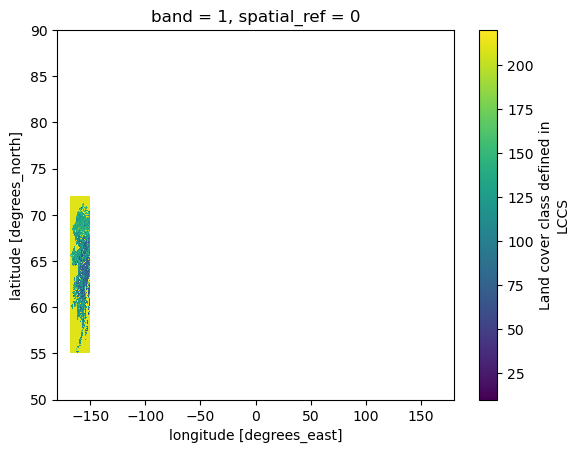

In [ ]:
lc_interp['lccs_class'].plot()

In [ ]:
results = {}

for year in range(1981, 2002):

    ds = globals()[f"lst_{year}"]   # load lst_1981, lst_1982, ...

    # 2. Fixed 10-day bins anchored at Jan 1 every year
    
    ds = ds.where(lc_interp['lccs_class'] != 210)
    print(ds)
    clean_LST = ds['LST'].where(ds['LST'] != 110, np.nan)
    max_mon = (
        clean_LST
        .resample(
            time='1MS'
        )
        .max()
    )

    # Ensure bins exist even with no data
    # Xarray automatically creates them and fills with NaN

    results[year] = max_mon

/tmp/ipykernel_18215/766118834.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  return xr.apply_ufunc(
/tmp/ipykernel_18215/766118834.py:10: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead 

In [ ]:
combined = xr.concat([results[y] for y in range(1981, 2002)], dim="time")

In [ ]:
combined

['2001-01-16T00:00:00.000000000' '2001-02-01T00:00:00.000000000'
 '2001-02-16T00:00:00.000000000' '2001-03-01T00:00:00.000000000'
 '2001-03-16T00:00:00.000000000' '2001-04-01T00:00:00.000000000'
 '2001-04-16T00:00:00.000000000']


In [ ]:
import pandas as pd

new_time = combined.time.to_index() + pd.DateOffset(months=1)

combined = combined.assign_coords(time=new_time)

In [ ]:
combined

In [ ]:
jf_max = (
    combined
    .where(combined.time.dt.month.isin([1, 2]), drop=True)
    .groupby("time.year")
    .max("time")
)

In [ ]:
jf_max

NameError: name 'jf_max' is not defined

In [ ]:
ja_max = (
    combined
    .where(combined.time.dt.month.isin([7, 8]), drop=True)
    .groupby("time.year")
    .max("time")
)

In [ ]:
ja_max

In [ ]:
clim_jf = jf_max.mean("year")
anom_jf = jf_max - clim_jf
clim_ja = ja_max.mean("year")
anom_ja = ja_max - clim_ja

In [ ]:
anoms = anom_ja.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms = anoms.chunk(dict(year=-1))   # <<< REQUIRED

In [ ]:
def theil_sen_1d(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return slope


In [ ]:
slope_ja = xr.apply_ufunc(
    theil_sen_1d,
    anoms,
    anoms.year.values,
    input_core_dims=[["year"], ["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade_ja = slope_ja * 1

In [ ]:
slope

<xarray.DataArray (lat: 340, lon: 360)>
dask.array<transpose, shape=(340, 360), dtype=float64, chunksize=(340, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.03 55.08 55.12 55.17 ... 71.82 71.88 71.93 71.97
  * lon      (lon) float32 -168.0 -167.9 -167.9 -167.8 ... -150.1 -150.1 -150.0

In [ ]:
with ProgressBar():
    res_ja = trend_per_decade_ja.compute()

[########################################] | 100% Completed | 29m 41s


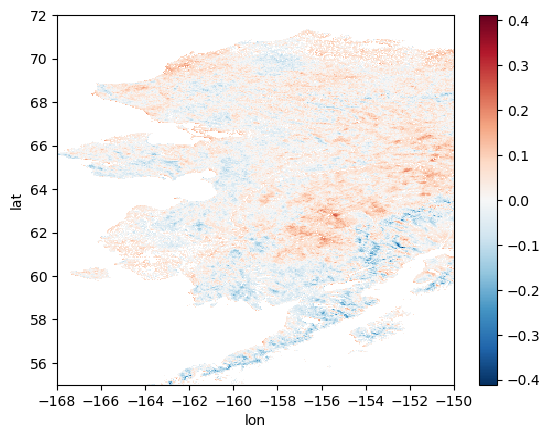

In [ ]:
res_ja.plot();
# seems too much!
# comiso and hall same magnitude for Alaska

In [ ]:
# spacing of the 10D max bins ? space it like 3 per month ? -> use monthly max ? maybe use bi-monthly
# robustness of trends ? -> maybe 5 points! 
# validtidy of mean for the climatology ? clear-sky biais trend there ?
# clear sky bias ? -> compute number of valid points !
# annual max temp ? - satellites are drifting? -> verify time series, compare with modis! what are the overpass times ? afternoon sats are the warm temperatures !
# compare to MODIS data ? -> maybe few points ?
# mask out with significance ?
# compare with CARRA 

In [ ]:
import pymannkendall as mk

def mk_pvalue(y):
    y = y[np.isfinite(y)]
    if y.size < 5:
        return np.nan
    return mk.original_test(y).p

In [ ]:
mk_p_ja = xr.apply_ufunc(
    mk_pvalue,
    anoms,
    input_core_dims=[["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [ ]:
with ProgressBar():
    p_val_ja = mk_p_ja.compute()

[########################################] | 100% Completed | 34m 26s


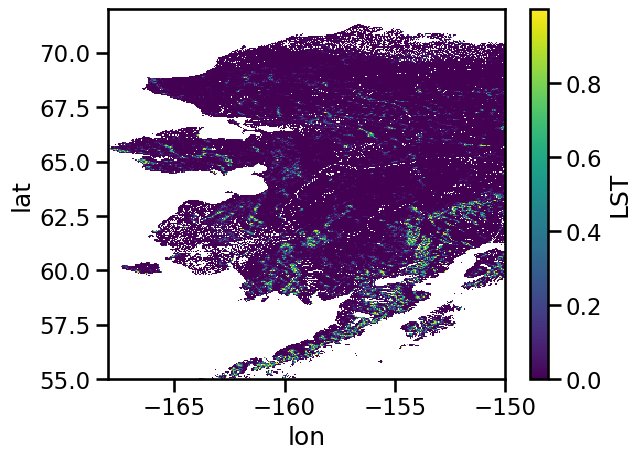

In [ ]:
p_val_ja.plot();

In [ ]:
significant_trend_ja = res_ja.where(p_val_ja < 0.1)

In [ ]:
significant_trend_ja.plot();

In [ ]:
## Winter
anoms_jf = anom_jf.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms_jf = anoms_jf.chunk(dict(year=-1))   # <<< REQUIRED

In [ ]:
slope_jf = xr.apply_ufunc(
    theil_sen_1d,
    anoms_jf,
    anoms_jf.year.values,
    input_core_dims=[["year"], ["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

trend_per_decade_jf = slope_jf * 1

In [ ]:
with ProgressBar():
    res_jf = trend_per_decade_jf.compute()

In [ ]:
res_jf.plot();

In [ ]:
mk_p_jf = xr.apply_ufunc(
    mk_pvalue,
    anoms_jf,
    input_core_dims=[["year"]],
    output_core_dims=[[]],
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
)

In [ ]:
with ProgressBar():
    p_val_jf = mk_p_jf.compute()

In [ ]:
significant_trend_jf = res_jf.where(p_val_jf < 0.1)

In [ ]:
significant_trend_jf.plot();